In [1]:
!pip install netCDF4
!pip install cartopy
#il faut l'executer une fois pour importer les librairies

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 39.9 MB/s eta 0:00:00


In [2]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import norm
import xarray as xr
import netCDF4 as nc
import numpy as np
from sklearn.linear_model import RidgeCV
import pandas as pd
import cftime
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path='drive/MyDrive/projet/data'

In [8]:
for file_name in os.listdir(path):
    # Chemin complet du fichier
    file_path = os.path.join(path, file_name)

    # Vérification si le chemin correspond à un fichier netCDF
    if os.path.isfile(file_path) and file_name.endswith('.nc'):
        # Chargement des données à l'aide de xarray
        ds = xr.open_dataset(file_path)
        time_data = ds['time_bnds'].values
        # Affichage des noms des variables
        print("time data", file_name, ":", ds.tas)
        # Fermeture du dataset
        ds.close()

time data tas_mon_CESM2_historical_ssp370_r1011.001i1p1f1.188001-202212.nc : <xarray.DataArray 'tas' (time: 1716, lat: 72, lon: 144)> Size: 142MB
[17791488 values with dtype=float64]
Coordinates:
  * time     (time) object 14kB 1880-01-16 12:00:00 ... 2022-12-16 12:00:00
  * lat      (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:     Reference height temperature
    units:         K
    cell_methods:  time: mean
time data tas_mon_CESM2_historical_ssp370_r1031.002i1p1f1.188001-202212.nc : <xarray.DataArray 'tas' (time: 1716, lat: 72, lon: 144)> Size: 142MB
[17791488 values with dtype=float64]
Coordinates:
  * time     (time) object 14kB 1880-01-16 12:00:00 ... 2022-12-16 12:00:00
  * lat      (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:     Refere

In [13]:
for file_name in os.listdir(path):
    # Chemin complet du fichier
    file_path = os.path.join(path, file_name)

    # Vérification si le chemin correspond à un fichier netCDF
    if os.path.isfile(file_path) and file_name.endswith('.nc'):
        # Chargement des données à l'aide de xarray
        ds = xr.open_dataset(file_path)
        anomalies = ds['tas']
        ds.close()

In [20]:
import cftime

time=1715
member=10

# Extract year from cftime objects
years = [d.year + 1850 for d in anomalies['time'].values]
# Assuming you want to extract the month (0-11)
months = [d.month for d in anomalies['time'].values]


In [21]:
plot_data = anomalies.values[time,:,:]  # Accessing with 3 indices: time, latitude, longitude

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


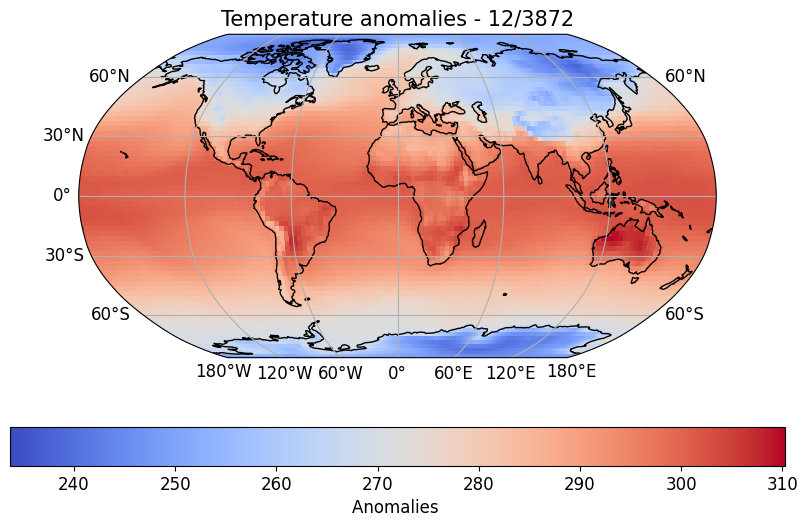

In [22]:
# Plotting
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())

# Plot for diff_r2_map
contour = ax.pcolormesh(anomalies['lon'], anomalies['lat'], plot_data, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}  # Longitude font size
gl.ylabel_style = {'size': 12}  # Latitude font size

ax.set_title(r'Temperature anomalies - {}/{}'.format(int(months[time]), int(years[time])), fontsize=15)

cb = plt.colorbar(contour, ax=ax, label='Anomalies', orientation='horizontal')
cb.ax.tick_params(labelsize=12)
cb.set_label(r'Anomalies ', fontsize=12)

plt.show()